In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('datasets/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [4]:
data_new = data['1995-01':'2024-09'].copy()# 筛选1995-01-01至2024-09-30的数据
data_new['Close'] = pd.to_numeric(data_new['Close'])# 转换为数值型
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])# 转换为数值型
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1   #计算收益率
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,-0.023035
...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,0.036131


In [5]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data.reset_index(inplace = True)
Month_data.rename(columns = {'Day':'month'}, inplace = True)
Month_data.set_index('month', inplace = True)
Month_data

,Raw_return
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


计算季度收益率

In [ ]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()# 计算季度收益率
Quarter_data.reset_index(inplace = True)# 重置索引
Quarter_data.rename(columns = {'Day':'Q'}, inplace = True)# 重命名列
Quarter_data.set_index('Q', inplace = True)# 设置索引
Quarter_data


,Raw_return
Q,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


计算季度收益率:


In [ ]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()# 计算年度收益率
Year_data.reset_index(inplace = True)# 重置索引
Year_data.rename(columns = {'Day':'Year'}, inplace = True)# 重命名列
Year_data.set_index('Year', inplace = True)# 设置索引
Year_data


,Raw_return
Year,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [ ]:
inflation = pd.read_csv('datasets/inflation.csv')# 读取通胀数据
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month', inplace = True)# 设置索引
inflation.sort_values(by = ['month'],axis=0, ascending=True)


,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2025-03-31,-0.1
2025-04-30,-0.1
2025-05-31,-0.1


# 月度数据的预测

A simple linear regression of an asset return on one or a few lagged predictors of interest is the most popular econometric approach for testing for return predictability. For simplicity, consider a univariate predictive regression of the period- $(t + 1)$ stock market return $r_{t+1}$ on a single predictor variable $x_t$:
$$
r_{t+1}=\alpha+\beta x_{t}+\varepsilon_{t+1}
$$
where $\varepsilon_{t+1}$ is a zero-mean, unpredictable disturbance term. When $x_t$ is the inflation rate, dividend yield, book-to-price ratio, or turnover. Many researchers find that $\beta$ is significantly different from zero; that is, there is in-sample evidence of stock market return predictability.

* H0:$\beta = 0$
* H1:$\beta \ne 0$(我们需要通过理论分析，得出$\beta$的符号)


### 波动率预测
data_new.resample('ME')

In [ ]:
market_variance = data_new.resample('ME').apply({
    'Raw_return':
    lambda x: sum(x**2)
})# 计算月度波动率
market_variance.reset_index(inplace=True)
market_variance.rename(columns={'Day':'month','Raw_return':'RV'},inplace=True)
market_variance.set_index('month',inplace=True)
market_variance

,RV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


# 月度数据的预测

A simple linear regression of an asset return on one or a few lagged predictors of interest is the most popular econometric approach for testing for return predictability. For simplicity, consider a univariate predictive regression of the period- $(t + 1)$ stock market return $r_{t+1}$ on a single predictor variable $x_t$:
$$
r_{t+1}=\alpha+\beta x_{t}+\varepsilon_{t+1}
$$
where $\varepsilon_{t+1}$ is a zero-mean, unpredictable disturbance term. When $x_t$ is the inflation rate, dividend yield, book-to-price ratio, or turnover. Many researchers find that $\beta$ is significantly different from zero; that is, there is in-sample evidence of stock market return predictability.

* H0:$\beta = 0$
* H1:$\beta \ne 0$(我们需要通过理论分析，得出$\beta$的符号)

## 波动率
resample('ME') 是 pandas 中的重采样'ME' 表示按月度频率重采样（Month End，即每月最后一天为节点汇总数据）。
.apply({ 'Raw_return': lambda x: sum(x**2) })
inplace=True：表示直接在原 DataFrame（market_variance）上修改，不需要创建新的副本
columns={'Day':'month','Raw_return':'RV'}# 重命名列

In [ ]:
market_variance = data_new.resample('ME').apply({
    'Raw_return':
    lambda x: sum(x**2)
})
market_variance.reset_index(inplace=True)# 重置索引
market_variance.rename(columns={'Day':'month','Raw_return':'RV'},inplace=True)#
market_variance.set_index('month',inplace=True)#重置索引为月份
market_variance

,RV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


# 换手率
## 模型 价量模型 

$$
r_{t+1} = \alpha + \beta*turnover_{t} + \varepsilon_{t+1}
$$

两个假设：

换手率越高，意味着股票市场的交易越活跃，投资者们不停地在交易股票，也就是说一只股票有很多人在买也有很多人在卖，大家即有人愿意买，也有人愿意卖。这说明大家对同一只股票的看法不一样，市场整体的换手率增加了意味着投资者对于股票市场的判断分歧比较大，这种不确定性的增加有可能就是股票市场预期风险的增加，所以未来的股票的收益率上升。

* H1： $\beta > 0$

换手率越高，意味着股票市场的交易越活跃，这种更加活跃的交易带来的是投资者的热情高涨，越来越多的投资者愿意投身到股票交易中去，股票市场被更多的交易炒热了，股票价格在同一时间上升，这容易造成在同期的股票市场价格被高估。然而市场总是理性的，在未来投资者会发现之前的价格被高估了，从而还会降到正常的水平，所以未来的股票收益率会下降（未来的价格会降下来）。

* H2： $\beta < 0$

换手率的定义如下：
$$
T O_{t}=\sum_{d=1}^{D_{t}}\left(\frac{\sum_{i}^{N_{d}} N T S_{i, d, t}}{\sum_{i}^{N_{d}} N O S_{i, d, t}}\right)
$$
其中，$NTS_{i, d, t}$是股票$i$在$t$月$d$日的交易量，$NOS_{i, d, t}$是股票$i$在$t$月$d$日的流通股数。$D_{t}$是$t$月的交易天数，$N_{d}$是$d$日的交易股票数量。

每一天的交易量 A 100股 B 200股 C 300股，A的流通股1000，B股票的流通股是1500，C股票的流通股是5000,这一天的换手率是：
$$
TO_d = \frac{100 + 200 + 300}{1000 + 1500 + 5000} = 8\%
$$
第二天是9\%,第三天是10\%,月换手率 （8+9+10）\%

## 中国股票市场的几个事实

- 市值：流通市值和总市值 同股同权 港股 B股
- 换手率：交易量 交易金额
- T+1
- 10% 日交易价格的限制 （会有一些例外的情况）

'{:0>6}'.format(x) 是 Python 中的字符串格式化方法，用于将变量 x 格式化为一个长度为 6 的字符串，左侧用零填充。具体解释如下：

{:0>6} 是格式说明符。
0 表示用零填充。
$>$ 表示右对齐。
6 表示总长度为 6。
例如：

如果 x 是 42，则 '{:0>6}'.format(42) 的结果是 '000042'。
如果 x 是 123456，则结果是 '123456'（因为已经是 6 位长，不需要填充）。
这个方法常用于需要固定长度的字符串表示，例如生成固定长度的编号。

In [ ]:
cross = pd.read_csv('datasets/cross_section2023.csv')# 读取2023年的跨期数据
from pandas.tseries.offsets import MonthEnd# 导入月结束偏移量
cross['month'] = pd.to_datetime(cross['month'], format='%Y-%m-%d') + MonthEnd(1)# 转换为月结束日期
cross['to_v'] = pd.to_numeric(cross['to_v'])# 转换为数值类型
cross['floatingvalue'] = pd.to_numeric(cross['floatingvalue'])# 转换为数值类型
cross = cross.dropna(subset=['to_v','floatingvalue'])# DataFrame cross 中删除指定列（'to_v' 和 'floatingvalue'）包含缺失值（NaN）的行
cross = cross.dropna()#删除确实值
# 补齐股票代码 如果不满6位 在前面补上0
cross['Stkcd'] = cross['Stkcd'].apply(lambda x: '{:0>6}'.format(x)) # 6位股票代码
cross['w'] = 1# 权重设为1 权重意味着每个样本（如每只股票）在计算中所占的 “分量” 相同，无需区分大小或重要性。
cross

,Stkcd,month,Rank,Freq,ret,floatingvalue,totalvalue,sizef,sizet,to_v,w
1,000001,1991-05-31,2,24.0,-0.128345,1.016010e+09,1.859497e+09,20.739149,21.343572,0.007087,1
2,000001,1991-06-30,3,23.0,-0.119551,9.007350e+08,1.648521e+09,20.618722,21.223144,0.001155,1
3,000001,1991-07-31,4,16.0,-0.137013,7.828100e+08,1.432695e+09,20.478401,21.082823,0.000230,1
4,000001,1991-08-31,5,15.0,-0.417680,6.748338e+08,1.346275e+09,20.329977,21.020607,0.072087,1
5,000001,1991-09-30,6,24.0,-0.039425,6.523394e+08,1.301399e+09,20.296075,20.986706,0.160940,1
...,...,...,...,...,...,...,...,...,...,...,...
752023,605599,2023-08-31,24,23.0,-0.027103,7.955351e+09,1.054667e+10,22.797111,23.079076,0.134479,1
752024,605599,2023-09-30,25,20.0,0.071030,8.530295e+09,1.130889e+10,22.866890,23.148855,0.137497,1
752025,605599,2023-10-31,26,17.0,-0.048696,8.125488e+09,1.077222e+10,22.818272,23.100237,0.086762,1
752026,605599,2023-11-30,27,22.0,-0.027956,7.908417e+09,1.048444e+10,22.791193,23.073159,0.062795,1


cross.groupby(['month'])是进行分组

In [ ]:

turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['w']) 
, include_groups=False))# 计算每个月的加权平均换手率
turnover = turnover.rename(columns={0:'to'})
turnover

,to
month,
1991-01-31,0.080590
1991-02-28,0.059403
1991-03-31,0.088436
1991-04-30,0.076774
1991-05-31,0.103625
...,...
2023-08-31,0.679114
2023-09-30,0.511237
2023-10-31,0.472415


In [ ]:
reg_data = pd.merge(Month_data,market_variance,on = 'month')# 合并月数据和市场方差数据
reg_data = pd.merge(reg_data,inflation,on = 'month')# 合并月数据和通胀数据
reg_data = pd.merge(reg_data,turnover,on='month')# 合并月数据和换手率数据
reg_data = reg_data['2000':]
reg_data

,Raw_return,RV,cpi,to
month,,,,
2000-01-31,0.123242,0.008258,-0.2,0.442983
2000-02-29,0.116990,0.013547,0.7,0.590660
2000-03-31,0.049948,0.007877,-0.2,0.830738
2000-04-30,0.020053,0.002494,-0.3,0.536236
2000-05-31,0.031710,0.003515,0.1,0.377358
...,...,...,...,...
2023-08-31,-0.052009,0.001546,0.1,0.679114
2023-09-30,-0.003013,0.000884,0.0,0.511237
2023-10-31,-0.029483,0.001068,-0.2,0.472415


In [19]:
reg_data['to'].describe().round(5)

count    288.00000
mean       0.51596
std        0.24840
min        0.07873
25%        0.36010
50%        0.50346
75%        0.62890
max        1.39188
Name: to, dtype: float64

In [20]:
reg_data['to'].skew()
reg_data['to'].kurt()

np.float64(0.7663294036311821)

np.float64(0.8887947299969237)

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

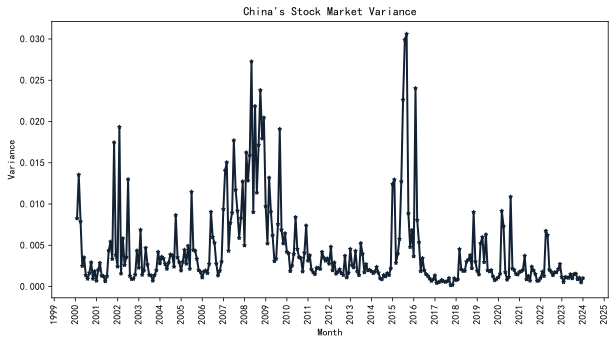

In [32]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(
    'RV',
    '-*',
    markersize=4,
    color='#122133',  # 修改为6位十六进制颜色
    linewidth=2,
    data=reg_data['2000-01-01':'2023-12-31'])
plt.title("China's Stock Market Variance")
plt.xlabel('Month')
plt.ylabel('Variance')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

fig.savefig('Variance.pdf', bbox_inches='tight')
plt.show();

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

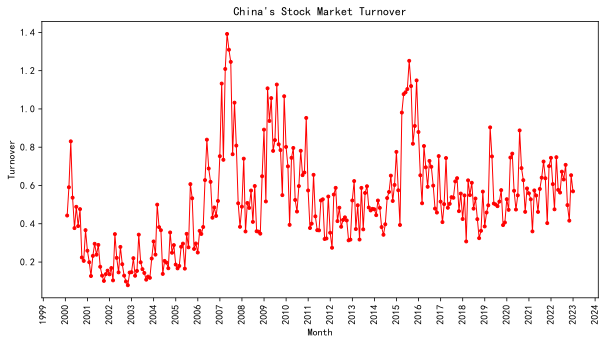

In [33]:
fig = plt.figure(figsize=(10, 5)) # 图片比例
ax = fig.add_subplot(1, 1, 1)  # 定义ax
ax.plot(
    'to',  # 要画图的变量名
    '.-r',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2022-12-31'])  # 画图的数据
plt.title("China's Stock Market Turnover") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('Turnover') # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

fig.savefig('Turnover.pdf', bbox_inches='tight')
plt.show();

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


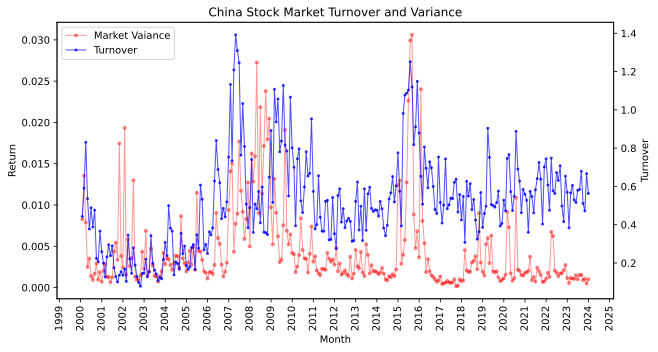

In [34]:
# Change the figure style
# list the figure style
print(plt.style.available)
#plt.style.use('ggplot')
# 使用默认的画图风格
plt.style.use('default')

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['RV'],
         color='red',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Vaiance')
ax1.set_xlabel('Month')  # 设置横坐标标签
ax1.set_ylabel('Return')  # 设置左边纵坐标标签
#ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("China Stock Market Turnover and Variance")  # 给整张图命名

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['to'],
         color='blue',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='Turnover')
ax2.set_ylabel('Turnover')  # 设置右边纵坐标标签
#ax2.legend(loc=1)  # 设置图例在右上方

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig = plt.gcf()
fig.savefig('mvto.pdf', bbox_inches='tight')
plt.show();

In [35]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_fore_mv = smf.ols('RV ~ lRV',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     54.82
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           1.49e-12
Time:                        16:56:36   Log-Likelihood:                 1170.7
No. Observations:                 287   AIC:                            -2337.
Df Residuals:                     285   BIC:                            -2330.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.000      4.853      0.0

In [36]:
reg_data['lto'] = reg_data['to'].shift(1)
model_fore_mv = smf.ols('RV ~ lto',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.677
Date:                Sat, 08 Nov 2025   Prob (F-statistic):             0.0103
Time:                        16:56:43   Log-Likelihood:                 1117.3
No. Observations:                 287   AIC:                            -2231.
Df Residuals:                     285   BIC:                            -2223.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0012      0.001      0.935      0.3

In [37]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_fore_mv = smf.ols('RV ~ lto + lRV',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     28.76
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           4.23e-12
Time:                        16:56:51   Log-Likelihood:                 1173.1
No. Observations:                 287   AIC:                            -2340.
Df Residuals:                     284   BIC:                            -2329.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0007      0.001      1.028      0.3

In [38]:
reg_data['fitted_mv'] = model_fore_mv.fittedvalues
reg_data

,Raw_return,RV,cpi,to,lRV,lto,fitted_mv
month,,,,,,,
2000-01-31,0.123242,0.008258,-0.2,0.442983,NaN,NaN,NaN
2000-02-29,0.116990,0.013547,0.7,0.590660,0.008258,0.442983,0.006450
2000-03-31,0.049948,0.007877,-0.2,0.830738,0.013547,0.590660,0.009823
2000-04-30,0.020053,0.002494,-0.3,0.536236,0.007877,0.830738,0.007105
2000-05-31,0.031710,0.003515,0.1,0.377358,0.002494,0.536236,0.003346
...,...,...,...,...,...,...,...
2023-08-31,-0.052009,0.001546,0.1,0.679114,0.001511,0.583919,0.002889
2023-09-30,-0.003013,0.000884,0.0,0.511237,0.001546,0.679114,0.003124
2023-10-31,-0.029483,0.001068,-0.2,0.472415,0.000884,0.511237,0.002365


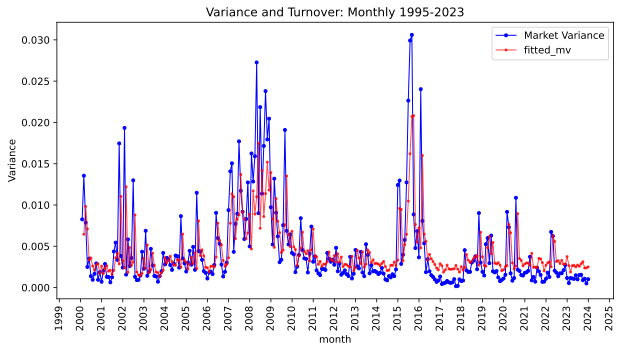

In [39]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['RV'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         label='Market Variance')
plt.xlabel('month')  # 设置横坐标标签
plt.ylabel('Variance')  # 设置左边纵坐标标签
#plt.legend(loc=2)  # 设置图例在左上方
plt.title("Variance and Turnover: Monthly 1995-2023")  # 给整张图命名

ax1.plot(reg_data['fitted_mv'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='fitted_mv')
# ax2.set_ylabel('fitted_mv')  # 设置右边纵坐标标签
# ax2.legend(loc=1)  # 设置图例在右上方

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

plt.legend(loc='upper right')

fig.savefig('MV_fitted.pdf', bbox_inches='tight')
plt.show();

In [40]:
reg_data['lto'] = reg_data['to'].shift(1)
model_to = smf.ols('Raw_return ~ lto',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                    0.6055
Date:                Sat, 08 Nov 2025   Prob (F-statistic):              0.437
Time:                        16:57:19   Log-Likelihood:                 354.34
No. Observations:                 287   AIC:                            -704.7
Df Residuals:                     285   BIC:                            -697.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0047      0.011     -0.414      0.6

In [41]:
reg_data

,Raw_return,RV,cpi,to,lRV,lto,fitted_mv
month,,,,,,,
2000-01-31,0.123242,0.008258,-0.2,0.442983,NaN,NaN,NaN
2000-02-29,0.116990,0.013547,0.7,0.590660,0.008258,0.442983,0.006450
2000-03-31,0.049948,0.007877,-0.2,0.830738,0.013547,0.590660,0.009823
2000-04-30,0.020053,0.002494,-0.3,0.536236,0.007877,0.830738,0.007105
2000-05-31,0.031710,0.003515,0.1,0.377358,0.002494,0.536236,0.003346
...,...,...,...,...,...,...,...
2023-08-31,-0.052009,0.001546,0.1,0.679114,0.001511,0.583919,0.002889
2023-09-30,-0.003013,0.000884,0.0,0.511237,0.001546,0.679114,0.003124
2023-10-31,-0.029483,0.001068,-0.2,0.472415,0.000884,0.511237,0.002365


In [42]:
Qreg_data = reg_data.resample('QE').apply({
    'Raw_return':
    lambda x: np.prod(1+x) - 1,
    'to':
    lambda x: sum(x),
    'cpi':
    lambda x: sum(x)
})
Qreg_data

,Raw_return,to,cpi
month,,,
2000-03-31,0.317318,1.864381,0.3
2000-06-30,0.071041,1.402174,0.3
2000-09-30,-0.009310,1.088189,0.8
2000-12-31,0.085501,0.831871,2.8
2001-03-31,0.018954,0.557962,2.0
...,...,...,...
2022-12-31,0.021448,1.639285,5.5
2023-03-31,0.059432,1.555359,3.8
2023-06-30,-0.021632,1.625901,0.3


In [43]:
Qreg_data['lto'] = Qreg_data['to'].shift(1)
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
model_to = smf.ols('Raw_return ~ lto + lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     4.598
Date:                Sat, 08 Nov 2025   Prob (F-statistic):             0.0125
Time:                        16:57:44   Log-Likelihood:                 56.645
No. Observations:                  95   AIC:                            -107.3
Df Residuals:                      92   BIC:                            -99.63
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0103      0.046     -0.226      0.8

In [44]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('Raw_return ~ lto',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('Raw_return ~ lto + lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to, model_cpi, model_cpito],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['Quarter Turnover', 'Quarter Inflation', 'Quarter CPI & Inflation'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Quarterly Stock Market Return')

print(results_table)

      Table - OLS Regressions: Forecast Quarterly Stock Market Return
                 Quarter Turnover Quarter Inflation Quarter CPI & Inflation
---------------------------------------------------------------------------
Intercept        -0.049           0.057**           -0.010                 
                 (0.043)          (0.023)           (0.046)                
lto              0.041                              0.045                  
                 (0.028)                            (0.031)                
lcpi                              -0.007**          -0.007***              
                                  (0.003)           (0.002)                
R-squared        0.039            0.068             0.114                  
R-squared Adj.   0.029            0.058             0.095                  
No. observations 95               95                95                     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Marketret_allstock.csv'